In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 74s 4us/step


/Users/xin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/xin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 4s 3us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

In [8]:
def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences),dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0,0:20]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [12]:
x_train[1,0:20]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1.])

In [13]:
train_data.shape

(25000,)

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_label = np.asarray(test_labels).astype('float32')

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size = 512, validation_data=(x_val, y_val))

2022-02-08 00:46:34.027337: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-08 00:46:34.027680: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 318us/sample - loss: 0.5013 - accuracy: 0.8016 - val_loss: 0.3815 - val_accuracy: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.3041 - accuracy: 0.9013 - val_loss: 0.3463 - val_accuracy: 0.8563
Epoch 3/20
15000/15000 [==============================] - 2s 131us/sample - loss: 0.2238 - accuracy: 0.9290 - val_loss: 0.2786 - val_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.1762 - accuracy: 0.9436 - val_loss: 0.2763 - val_accuracy: 0.8896
Epoch 5/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.1453 - accuracy: 0.9527 - val_loss: 0.2918 - val_accuracy: 0.8834
Epoch 6/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.1170 - accuracy: 0.9647 - val_loss: 0.3378 - val_accuracy: 0.8742
Epoch 7/20
15000/15000 [==========================

In [20]:
history_dict = history.history

In [21]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
import matplotlib.pyplot as plt

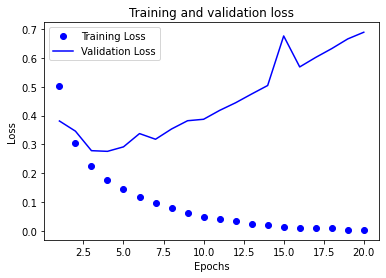

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

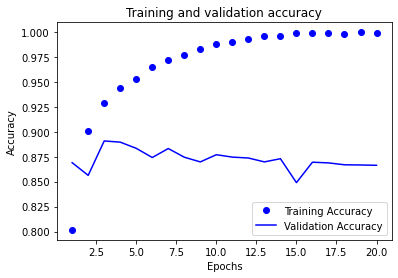

In [26]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512)
results = model.evaluate(x_val, y_val)

Train on 15000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 197us/sample - loss: 0.5350 - accuracy: 0.7815
Epoch 2/4
15000/15000 [==============================] - 1s 85us/sample - loss: 0.3270 - accuracy: 0.8991
Epoch 3/4
15000/15000 [==============================] - 1s 83us/sample - loss: 0.2361 - accuracy: 0.9261
Epoch 4/4
15000/15000 [==============================] - 1s 79us/sample - loss: 0.1848 - accuracy: 0.9389
10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [28]:
results

[0.27323858082294467, 0.8919]

In [29]:
model.predict(x_test)

array([[0.2393063 ],
       [0.9979717 ],
       [0.8977123 ],
       ...,
       [0.0857918 ],
       [0.14604533],
       [0.533221  ]], dtype=float32)

In [30]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 281us/sample - loss: 0.5241 - accuracy: 0.7725 - val_loss: 0.3840 - val_accuracy: 0.8603
Epoch 2/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.2954 - accuracy: 0.9025 - val_loss: 0.3440 - val_accuracy: 0.8568
Epoch 3/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.2128 - accuracy: 0.9290 - val_loss: 0.2789 - val_accuracy: 0.8879
Epoch 4/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.1628 - accuracy: 0.9451 - val_loss: 0.2795 - val_accuracy: 0.8872
Epoch 5/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.1293 - accuracy: 0.9567 - val_loss: 0.2995 - val_accuracy: 0.8840
Epoch 6/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.1022 - accuracy: 0.9673 - val_loss: 0.3234 - val_accuracy: 0.8817
Epoch 7/20
15000/15000 [==========================

In [31]:
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 339us/sample - loss: 0.4767 - accuracy: 0.7737 - val_loss: 0.3193 - val_accuracy: 0.8817
Epoch 2/10
15000/15000 [==============================] - 3s 190us/sample - loss: 0.2603 - accuracy: 0.9039 - val_loss: 0.2788 - val_accuracy: 0.8885
Epoch 3/10
15000/15000 [==============================] - 3s 192us/sample - loss: 0.1838 - accuracy: 0.9343 - val_loss: 0.2766 - val_accuracy: 0.8897
Epoch 4/10
15000/15000 [==============================] - 3s 198us/sample - loss: 0.1480 - accuracy: 0.9475 - val_loss: 0.2992 - val_accuracy: 0.8871
Epoch 5/10
15000/15000 [==============================] - 3s 189us/sample - loss: 0.0994 - accuracy: 0.9679 - val_loss: 0.3382 - val_accuracy: 0.8839
Epoch 6/10
15000/15000 [==============================] - 3s 213us/sample - loss: 0.0826 - accuracy: 0.9732 - val_loss: 0.3468 - val_accuracy: 0.8845
Epoch 7/10
15000/15000 [==========================

In [32]:
model = keras.Sequential([
    layers.Dense(16,activation='tanh'),
    layers.Dense(16,activation='tanh'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 4s 242us/sample - loss: 0.4664 - accuracy: 0.8013 - val_loss: 0.3885 - val_accuracy: 0.8327
Epoch 2/10
15000/15000 [==============================] - 2s 127us/sample - loss: 0.2573 - accuracy: 0.9093 - val_loss: 0.2768 - val_accuracy: 0.8880
Epoch 3/10
15000/15000 [==============================] - 2s 124us/sample - loss: 0.1819 - accuracy: 0.9355 - val_loss: 0.2771 - val_accuracy: 0.8856
Epoch 4/10
15000/15000 [==============================] - 2s 133us/sample - loss: 0.1448 - accuracy: 0.9486 - val_loss: 0.2884 - val_accuracy: 0.8862
Epoch 5/10
15000/15000 [==============================] - 2s 125us/sample - loss: 0.1077 - accuracy: 0.9629 - val_loss: 0.3155 - val_accuracy: 0.8819
Epoch 6/10
15000/15000 [==============================] - 2s 127us/sample - loss: 0.0815 - accuracy: 0.9749 - val_loss: 0.4460 - val_accuracy: 0.8597
Epoch 7/10
15000/15000 [==========================

In [33]:
model = keras.Sequential([
    layers.Dense(16,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 4s 239us/sample - loss: 0.1728 - accuracy: 0.7873 - val_loss: 0.1211 - val_accuracy: 0.8621
Epoch 2/10
15000/15000 [==============================] - 2s 123us/sample - loss: 0.0924 - accuracy: 0.9059 - val_loss: 0.0994 - val_accuracy: 0.8752
Epoch 3/10
15000/15000 [==============================] - 2s 124us/sample - loss: 0.0670 - accuracy: 0.9283 - val_loss: 0.0902 - val_accuracy: 0.8839
Epoch 4/10
15000/15000 [==============================] - 2s 122us/sample - loss: 0.0518 - accuracy: 0.9467 - val_loss: 0.0868 - val_accuracy: 0.8848
Epoch 5/10
15000/15000 [==============================] - 2s 122us/sample - loss: 0.0420 - accuracy: 0.9580 - val_loss: 0.0866 - val_accuracy: 0.8819
Epoch 6/10
15000/15000 [==============================] - 2s 121us/sample - loss: 0.0345 - accuracy: 0.9665 - val_loss: 0.0842 - val_accuracy: 0.8845
Epoch 7/10
15000/15000 [==========================

In [34]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 1us/step


/Users/xin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/xin/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [35]:
len(train_data)

8982

In [36]:
len(test_data)

2246

In [38]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [39]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [40]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [41]:
train_labels[0]

3

In [42]:
def vetorize_sequences(sequences, dimensions =10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

In [43]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [48]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
            results[i,label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [49]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [50]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [53]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 370us/sample - loss: 2.5185 - accuracy: 0.5180 - val_loss: 1.6787 - val_accuracy: 0.6660
Epoch 2/20
7982/7982 [==============================] - 1s 178us/sample - loss: 1.4011 - accuracy: 0.7161 - val_loss: 1.3000 - val_accuracy: 0.7240
Epoch 3/20
7982/7982 [==============================] - 1s 172us/sample - loss: 1.0528 - accuracy: 0.7756 - val_loss: 1.1438 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 171us/sample - loss: 0.8340 - accuracy: 0.8185 - val_loss: 1.0406 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 180us/sample - loss: 0.6656 - accuracy: 0.8566 - val_loss: 0.9868 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 194us/sample - loss: 0.5295 - accuracy: 0.8911 - val_loss: 0.9351 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 171us

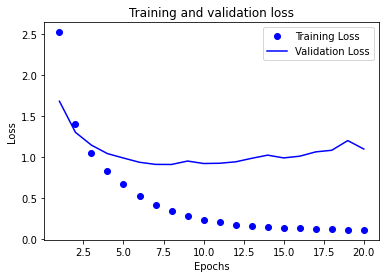

In [54]:
loss = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

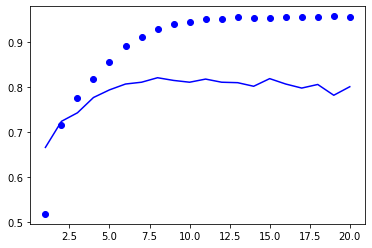

In [56]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo')
plt.plot(epochs, val_acc, 'b')
plt.show()

In [57]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=8, batch_size=512)
results = model.evaluate(x_test,y_test)

In [61]:
results

[1.156128717976177, 0.78406054]

In [62]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18432769367764915

In [63]:
predictions = model.predict(x_test)

In [64]:
predictions[0].shape

(46,)

In [65]:
np.sum(predictions[0])

1.0

In [66]:
predictions[0]

array([6.11111591e-06, 4.20541483e-06, 1.26968246e-07, 3.75944912e-01,
       6.10211909e-01, 2.46568874e-07, 1.50445358e-05, 2.64281807e-05,
       3.84777971e-03, 2.72196985e-06, 5.22615721e-07, 2.03024669e-04,
       5.48029857e-06, 7.44117142e-06, 2.57827469e-06, 1.23797554e-06,
       6.74697710e-03, 3.55313114e-06, 1.48054323e-05, 1.09691275e-04,
       1.20637438e-03, 1.10992801e-03, 3.54503584e-07, 1.35939681e-05,
       1.23462760e-08, 1.70905550e-05, 1.78946024e-07, 6.53779443e-06,
       5.16893215e-06, 1.77531037e-04, 6.68173452e-05, 2.13717112e-06,
       4.45018351e-08, 5.95303106e-07, 3.08672206e-05, 2.92175719e-06,
       2.96385515e-05, 5.31928151e-07, 1.29340178e-05, 1.04425708e-04,
       9.38114226e-07, 3.61495804e-05, 1.57864888e-05, 4.45304340e-06,
       7.57157981e-09, 1.21984286e-07], dtype=float32)

In [67]:
np.argmax(predictions[0])

4

In [72]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 452us/sample - loss: 3.2445 - accuracy: 0.3078 - val_loss: 2.7570 - val_accuracy: 0.3950
Epoch 2/20
7982/7982 [==============================] - 1s 176us/sample - loss: 2.4199 - accuracy: 0.4671 - val_loss: 2.1685 - val_accuracy: 0.5780
Epoch 3/20
7982/7982 [==============================] - 1s 172us/sample - loss: 1.8970 - accuracy: 0.6099 - val_loss: 1.7990 - val_accuracy: 0.5970
Epoch 4/20
7982/7982 [==============================] - 1s 180us/sample - loss: 1.5823 - accuracy: 0.6155 - val_loss: 1.6158 - val_accuracy: 0.6050
Epoch 5/20
7982/7982 [==============================] - 1s 169us/sample - loss: 1.3943 - accuracy: 0.6324 - val_loss: 1.5086 - val_accuracy: 0.6270
Epoch 6/20
7982/7982 [==============================] - 1s 174us/sample - loss: 1.2687 - accuracy: 0.6611 - val_loss: 1.4367 - val_accuracy: 0.6350
Epoch 7/20
7982/7982 [==============================] - 1s 179us

In [73]:
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 437us/sample - loss: 2.2047 - accuracy: 0.5474 - val_loss: 1.3745 - val_accuracy: 0.6930
Epoch 2/20
7982/7982 [==============================] - 2s 271us/sample - loss: 1.1069 - accuracy: 0.7661 - val_loss: 1.0809 - val_accuracy: 0.7610
Epoch 3/20
7982/7982 [==============================] - 2s 251us/sample - loss: 0.7698 - accuracy: 0.8364 - val_loss: 0.9596 - val_accuracy: 0.7970
Epoch 4/20
7982/7982 [==============================] - 2s 237us/sample - loss: 0.5480 - accuracy: 0.8875 - val_loss: 0.9054 - val_accuracy: 0.8040
Epoch 5/20
7982/7982 [==============================] - 2s 238us/sample - loss: 0.3986 - accuracy: 0.9152 - val_loss: 0.9173 - val_accuracy: 0.7890
Epoch 6/20
7982/7982 [==============================] - 2s 260us/sample - loss: 0.3176 - accuracy: 0.9282 - val_loss: 0.8669 - val_accuracy: 0.8180
Epoch 7/20
7982/7982 [==============================] - 2s 238us

In [74]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 456us/sample - loss: 2.6294 - accuracy: 0.4018 - val_loss: 1.7504 - val_accuracy: 0.5520
Epoch 2/20
7982/7982 [==============================] - 2s 192us/sample - loss: 1.5512 - accuracy: 0.6438 - val_loss: 1.3971 - val_accuracy: 0.6890
Epoch 3/20
7982/7982 [==============================] - 1s 179us/sample - loss: 1.1977 - accuracy: 0.7264 - val_loss: 1.2241 - val_accuracy: 0.7250
Epoch 4/20
7982/7982 [==============================] - 1s 179us/sample - loss: 0.9655 - accuracy: 0.7771 - val_loss: 1.1955 - val_accuracy: 0.7280
Epoch 5/20
7982/7982 [==============================] - 2s 193us/sample - loss: 0.7847 - accuracy: 0.8203 - val_loss: 1.0430 - val_accuracy: 0.7770
Epoch 6/20
7982/7982 [==============================] - 1s 184us/sample - loss: 0.6185 - accuracy: 0.8557 - val_loss: 1.2062 - val_accuracy: 0.7280
Epoch 7/20
7982/7982 [==============================] - 2s 190us

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [10]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'processing fold #{i}')
    val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [11]:
all_scores

[1.9418939, 2.522381, 2.388498, 2.3566523]

In [12]:
np.mean(all_scores)

2.3023562

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'processing fold #{i}')
    val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data,partial_train_targets,
              validation_data=(val_data,val_targets),
              epochs=num_epochs,batch_size=16,verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [18]:
all_mae_histories

[[18.102865,
  13.972638,
  9.349902,
  5.8758636,
  4.4104037,
  3.7831264,
  3.4272046,
  3.0606,
  3.0227714,
  2.7926903,
  2.7888181,
  2.724192,
  2.6015923,
  2.4832885,
  2.5169945,
  2.482125,
  2.4863398,
  2.4205654,
  2.5565445,
  2.4017112,
  2.2780464,
  2.2085896,
  2.1367543,
  2.1099322,
  2.0689037,
  2.1804404,
  2.0973442,
  2.0715175,
  2.0142844,
  1.9989705,
  2.294328,
  1.9944657,
  1.9731197,
  1.9724143,
  2.0093546,
  2.0987036,
  2.0014057,
  1.9282961,
  1.9923002,
  2.0198202,
  2.1573873,
  2.206269,
  1.9683555,
  1.9568243,
  2.005564,
  2.0252147,
  1.9848632,
  2.067886,
  1.9233391,
  1.9508622,
  1.9664623,
  1.9608644,
  1.8812441,
  2.077334,
  2.0798569,
  1.9341483,
  2.076908,
  1.9179717,
  1.9117625,
  1.9803551,
  1.8976742,
  1.9483542,
  1.9476719,
  1.887813,
  2.0022583,
  1.9686782,
  2.0427215,
  2.1545696,
  1.9454069,
  1.9367149,
  2.0581784,
  1.9776608,
  1.8903791,
  1.9357283,
  1.9843117,
  1.99934,
  1.9086986,
  1.9631146,
 

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [20]:
average_mae_history

[19.554083,
 16.277088,
 12.251575,
 8.367201,
 6.1631675,
 4.970717,
 4.255046,
 3.8012187,
 3.5879216,
 3.3686404,
 3.3112016,
 3.1642535,
 3.058274,
 2.9674454,
 2.9355812,
 2.890983,
 2.8547487,
 2.7995763,
 2.7831125,
 2.7213976,
 2.6948435,
 2.6749365,
 2.6175315,
 2.5894923,
 2.5837383,
 2.583105,
 2.5640159,
 2.5616028,
 2.4674802,
 2.497827,
 2.5682278,
 2.4789128,
 2.513733,
 2.4430053,
 2.5486927,
 2.5642617,
 2.461862,
 2.4597955,
 2.4793243,
 2.4719703,
 2.5405931,
 2.5568867,
 2.4625964,
 2.435649,
 2.4721966,
 2.469865,
 2.4151878,
 2.4544168,
 2.3932881,
 2.3946173,
 2.4111302,
 2.4783545,
 2.3756282,
 2.4302907,
 2.435558,
 2.3848014,
 2.4421854,
 2.3732746,
 2.3576913,
 2.4144657,
 2.3850803,
 2.4279237,
 2.4136076,
 2.3421454,
 2.41363,
 2.365951,
 2.3841681,
 2.4129567,
 2.3324804,
 2.3892918,
 2.3769033,
 2.3718915,
 2.3599136,
 2.4364402,
 2.3519468,
 2.364367,
 2.3822613,
 2.412853,
 2.3547192,
 2.3805046,
 2.4107873,
 2.3890843,
 2.378343,
 2.358727,
 2.350407,


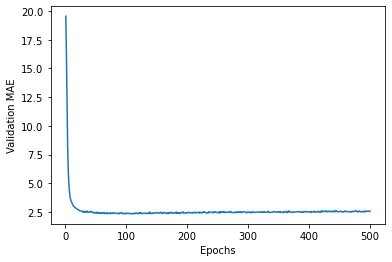

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

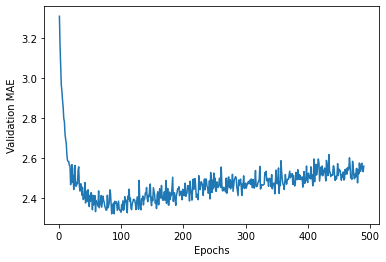

In [25]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1),truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [26]:
model = build_model()
model.fit(train_data,train_targets,epochs=130,batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data,test_labels)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [27]:
test_mae_score

2.5203369

In [28]:
test_mse_score

13.979620690439262

In [29]:
predictions = model.predict(test_data)
predictions[0]

array([8.400806], dtype=float32)

In [30]:
test_labels[0]

7.2